## Observations and Insights 

In [1]:
# Interactive plots
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_ms = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
df_ms.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
df_ms.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_msdup = df_ms[df_ms.duplicated(['Mouse ID','Timepoint'], keep=False)]
print(df_msdup.count())
df_msdup

Mouse ID              10
Drug Regimen          10
Sex                   10
Age_months            10
Weight (g)            10
Timepoint             10
Tumor Volume (mm3)    10
Metastatic Sites      10
dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
lst_dup = []
for i in range(len(df_msdup)):
    lst_dup.append(df_msdup.iloc[i,0])

df_dupall = pd.DataFrame({"Mouse ID": lst_dup})
df_dupall = df_dupall.drop_duplicates()
df_dupall = df_dupall.reset_index(drop=True)

df_msda = pd.merge(df_ms, df_dupall, on="Mouse ID")
df_msda_color = df_msda[['Mouse ID','Timepoint']].duplicated(keep=False)
rows = df_msda_color[df_msda_color].index.values

print(df_msda.count())
df_msda.style.apply(lambda x: ['background: #FFFF99' if x.name in rows else '' for i in x], axis=1)

Mouse ID              13
Drug Regimen          13
Sex                   13
Age_months            13
Weight (g)            13
Timepoint             13
Tumor Volume (mm3)    13
Metastatic Sites      13
dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,0,45.000000,0
2,g989,Propriva,Female,21,26,5,48.786801,0
3,g989,Propriva,Female,21,26,5,47.570392,0
4,g989,Propriva,Female,21,26,10,51.745156,0
5,g989,Propriva,Female,21,26,10,49.880528,0
6,g989,Propriva,Female,21,26,15,51.325852,1
7,g989,Propriva,Female,21,26,15,53.442020,0
8,g989,Propriva,Female,21,26,20,55.326122,1
9,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
lst_drop = []
for i in range(len(df_dupall)):
    df_drop = df_ms.loc[df_ms["Mouse ID"] == df_dupall["Mouse ID"][i]]
    for j in range(len(df_drop.index)):
        lst_drop.append(df_drop.index[j])

df_clean = df_ms.drop(lst_drop)
df_clean = df_clean.reset_index(drop=True)
df_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
df_clean.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
df_reg = df_clean.sort_values(by=["Drug Regimen"])
df_reg = df_reg.groupby(["Drug Regimen"])

means = df_reg["Tumor Volume (mm3)"].mean()
medians = df_reg["Tumor Volume (mm3)"].median()
vari = df_reg["Tumor Volume (mm3)"].var()
stds = df_reg["Tumor Volume (mm3)"].std()
sems = df_reg["Tumor Volume (mm3)"].sem()

stats = {
    "Mean": round([means][0],2),
    "Median": round([medians][0],2),
    "Variance": round([vari][0],2),
    "Std.Dev": round([stds][0],2),
    "SEM": round([sems][0],2)
}

df_stats = pd.DataFrame(stats)
df_stats

,Mean,Median,Variance,Std.Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function - by using dataframe.agg() function
column = df_reg["Tumor Volume (mm3)"]
column.agg([np.mean, np.median, np.var, np.std, st.sem])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


<IPython.core.display.Javascript object>


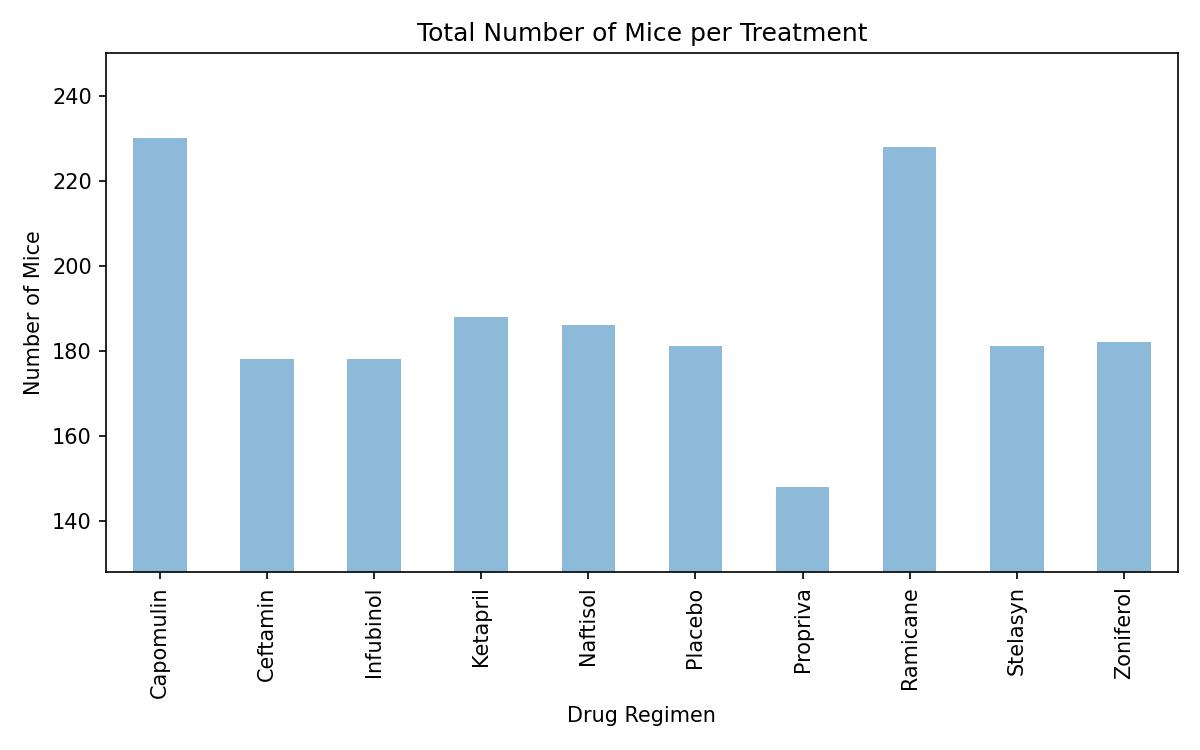

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
totalmice = df_reg["Mouse ID"].count()
print(totalmice)

plt.figure(figsize=(8,5))
barplot = totalmice.plot.bar(alpha=0.5)
#barplot.legend(["Total Mice"])

plt.title("Total Number of Mice per Treatment")
plt.ylabel("Number of Mice")
plt.tight_layout()
plt.ylim(min(totalmice)-20, max(totalmice)+20)

# Save the chart
plt.savefig(os.path.join("images","total_mice_treatment_pandas.png"))

# Show the chart
plt.show()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


<IPython.core.display.Javascript object>


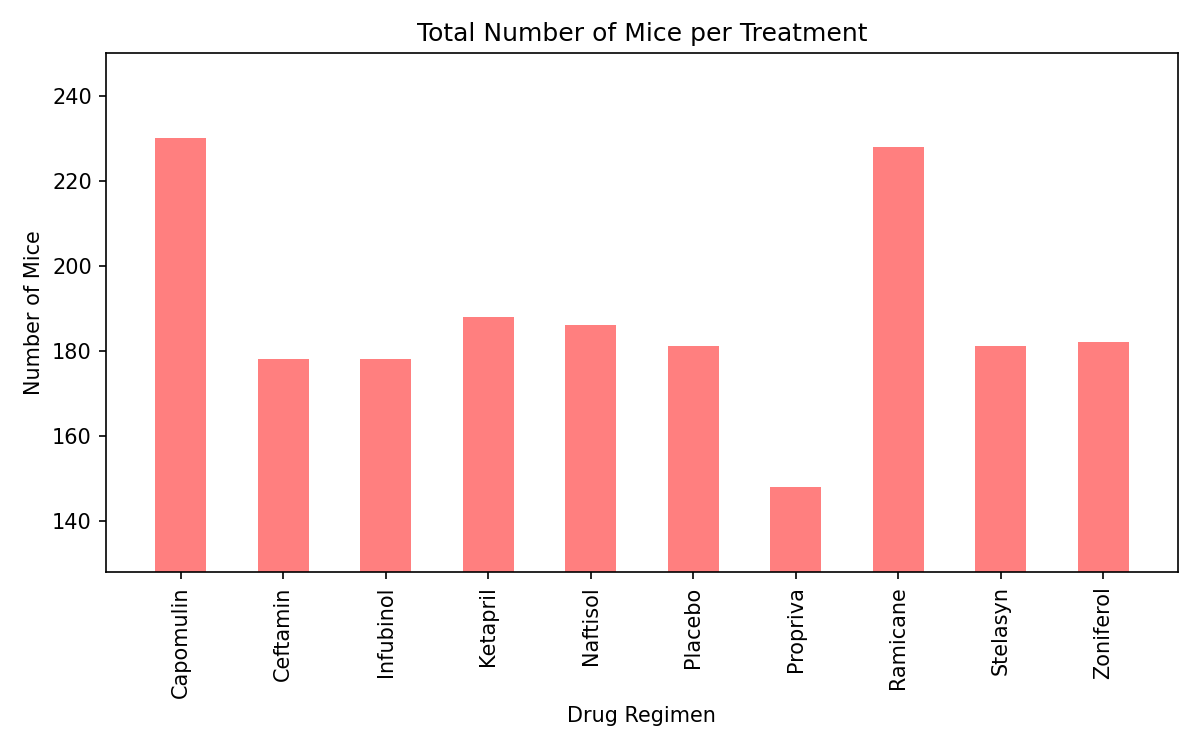

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
print(totalmice)

x_axis = np.arange(len(totalmice))

plt.figure(figsize=(8,5))
plt.bar(x=x_axis,height=totalmice, color='r', alpha=0.5, align="center", width=0.5)
plt.xticks(x_axis, df_reg["Drug Regimen"].first(), rotation=90)

plt.title("Total Number of Mice per Treatment")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.ylim(min(totalmice)-20, max(totalmice)+20)
plt.tight_layout()

# Save the chart
plt.savefig(os.path.join("images","total_mice_treatment_pyplot.png"))

# Show the chart
plt.show()

Sex
Male      958
Female    922
Name: Mouse ID, dtype: int64


<IPython.core.display.Javascript object>


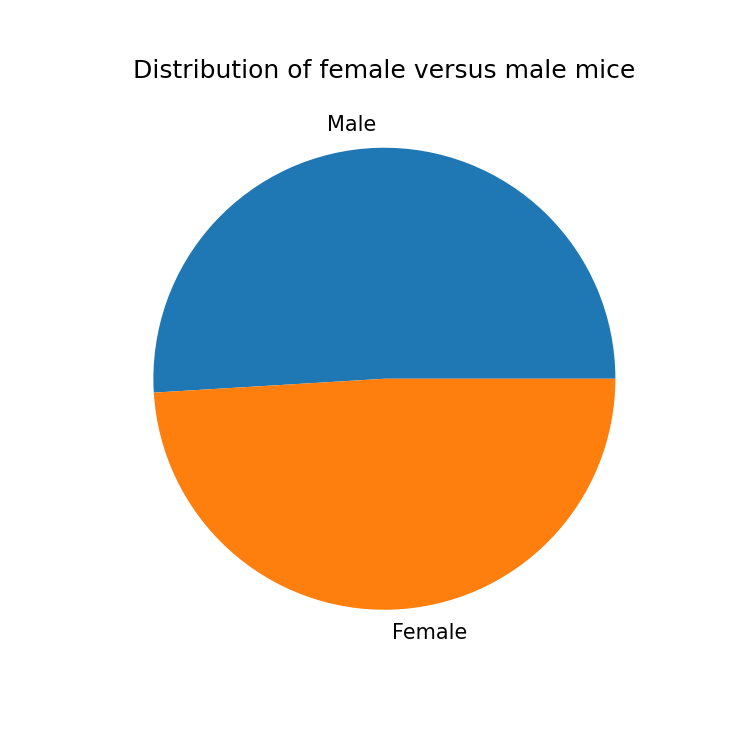

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df_gender = df_clean.groupby("Sex").count()
df_gender = df_gender.sort_values(by="Mouse ID", ascending=False)
df_gender = df_gender["Mouse ID"]
print(df_gender)

plt.figure(figsize=(5,5))
df_gender.plot.pie(y="Sex")

plt.title("Distribution of female versus male mice")
plt.ylabel("")

# Save the chart
plt.savefig(os.path.join("images","distr_mice_gender_pandas.png"))

# Show the chart
plt.show()

Sex
Male      958
Female    922
Name: Mouse ID, dtype: int64


<IPython.core.display.Javascript object>


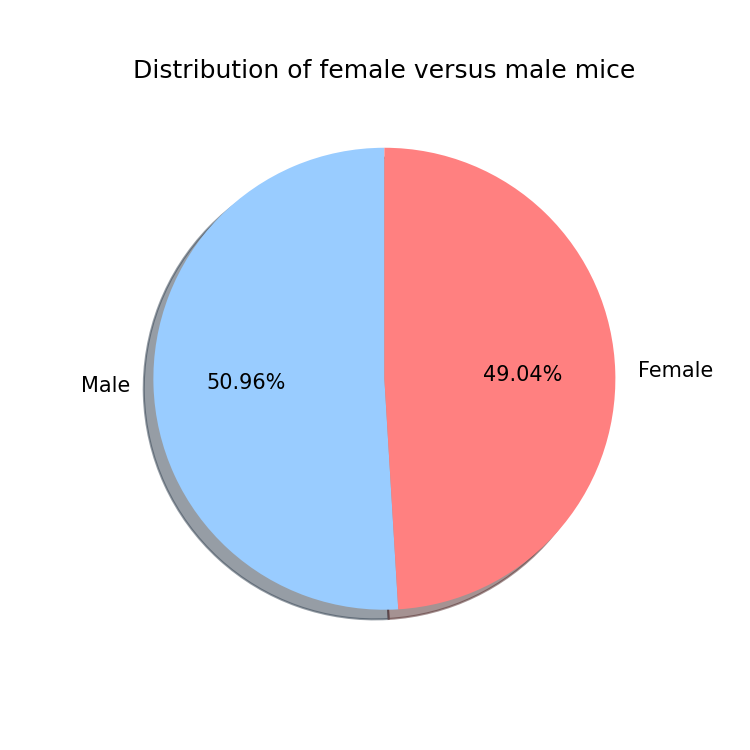

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
print(df_gender)

gender = df_gender.index
colors = ["#99CCFF", "#FF8080"]

plt.figure(figsize=(5,5))
plt.pie(df_gender, labels=gender, colors=colors, autopct="%1.2f%%", shadow=True, startangle=90)

plt.title("Distribution of female versus male mice")

# Save the chart
plt.savefig(os.path.join("images","distr_mice_gender_pyplot.png"))

# Show the chart
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens

# Sort the clean table by timepoint in ascending order
df_mice = df_clean.sort_values(by=["Timepoint"])

# Retrieving the last tumor volume
df_micereg_L = df_mice.groupby(["Drug Regimen","Mouse ID"])["Tumor Volume (mm3)"].last().reset_index()

# Retrieving the initial tumor volume to calculate the growth/shrink volume (delta)
#df_micereg_F = df_mice.groupby(["Drug Regimen", "Mouse ID"])["Tumor Volume (mm3)"].first().reset_index()

# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
reglst = {
 "Drug Regimen": ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
}

df_reglst = pd.DataFrame(reglst)
df_micereglst_L = pd.merge(df_micereg_L, df_reglst, on="Drug Regimen")
print(df_micereglst_L)

#df_micereglst_F = pd.merge(df_micereg_F, df_reglst, on="Drug Regimen")
#print(df_micereglst_F)

#delta = {}
# Calculate the delta difference in tumor volume across four of the interested regimens to get the growth/shrink volume
#for i in df_micereglst_L:
#    for j in df_micereglst_F:
#          delta = {
#              "Mouse ID": df_micereglst_L["Mouse ID"],
#              "Drug Regimen": df_micereglst_L["Drug Regimen"],
#              "Tumor Volume (mm3)": df_micereglst_L["Tumor Volume (mm3)"] - df_micereglst_F["Tumor Volume (mm3)"]
#          } 
#df_delta = pd.DataFrame(delta)
#print(df_delta)

# Start by getting the last (greatest) timepoint for each mouse
df_micetime_max = df_clean.groupby(["Mouse ID"])["Timepoint"].last().reset_index()
df_micetime_max = df_micetime_max.rename(columns={"Timepoint": "Timepoint (max)"})
#print(df_micetime_max)

# Omit any mouse with maximum timepoints of less than 45
# Create new list with only the ones with 45 max timepoints to have an equal dataset (eq)
micetime_eq = []
for i in range(len(df_micetime_max)):
    if (df_micetime_max["Timepoint (max)"][i] == 45):
        micetime_eq.append(df_micetime_max.iloc[i,0:2])
df_micetime_eq = pd.DataFrame(micetime_eq)
print(df_micetime_eq)

# Merge this group df with the original dataframe to get the (delta) tumor volume at the last timepoint
#df_tumor = pd.merge(df_delta, df_micetime_eq, on="Mouse ID")

# Merge this group df with the original dataframe to get the (final) tumor volume at the last timepoint
df_tumor = pd.merge(df_micereglst_L, df_micetime_eq, on="Mouse ID")
print(df_tumor)

   Drug Regimen Mouse ID  Tumor Volume (mm3)
0     Capomulin     b128           38.982878
1     Capomulin     b742           38.939633
2     Capomulin     f966           30.485985
3     Capomulin     g288           37.074024
4     Capomulin     g316           40.159220
..          ...      ...                 ...
95     Ramicane     s508           30.276232
96     Ramicane     u196           40.667713
97     Ramicane     w678           43.166373
98     Ramicane     y449           44.183451
99     Ramicane     z578           30.638696

[100 rows x 3 columns]
    Mouse ID  Timepoint (max)
0       a203               45
1       a251               45
2       a262               45
3       a275               45
5       a401               45
..       ...              ...
240     y865               45
244     z578               45
245     z581               45
246     z795               45
247     z969               45

[130 rows x 2 columns]
   Drug Regimen Mouse ID  Tumor Volume (mm3)  Timepo

## Functions - getoutliers()

In [14]:
# Create function for caculcating IQR and determining outliers of a passed dataset parameter
# Returns the outliers
def getoutliers(dataset):
    
    outliers = []
        
    # Create empty list to fill with tumor vol data (for plotting)
    tumor_data = []
    for i in range(len(dataset)):
        tumor_data.append(dataset["Tumor Volume (mm3)"][i])
    
    #Sort the tumor volume data list from lowest to greatest
    tumor_data.sort()
   
    # Create a new dataframe for the tumor volume data
    df_tumorq = pd.DataFrame(tumor_data)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes     
    # add subset 
    quantiles = df_tumorq.quantile([.25,.5,.75], interpolation="midpoint")
    
    q1 = quantiles.iloc[0,0]
    q3 = quantiles.iloc[2,0]
    iqr = q3 - q1
    median = quantiles.iloc[1,0]
    print(f"The lower quartile of tumor volume is: {round(q1,2)}")
    print(f"The upper quartile of tumor volume is: {round(q3,2)}")
    print(f"The interquartile range of tumor volume is: {round(iqr,2)}")
    print(f"The median of tumor volume is: {round(median,2)} ")
    print()
    
    # Determine outliers using upper and lower bounds
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    print(f"Values below {round(lower_bound,2)} could be outliers.")
    print(f"Values above {round(upper_bound,2)} could be outliers.")
    
    # Identify the outliers
    outliers = dataset.loc[(dataset["Tumor Volume (mm3)"] < lower_bound) | (dataset["Tumor Volume (mm3)"] > upper_bound)]
    outliers = outliers.sort_values(by=["Tumor Volume (mm3)"]).reset_index(drop=True)
    outliers = outliers.rename(columns={"Timepoint": "Timepoint (max)"})
    
    return outliers

<IPython.core.display.Javascript object>


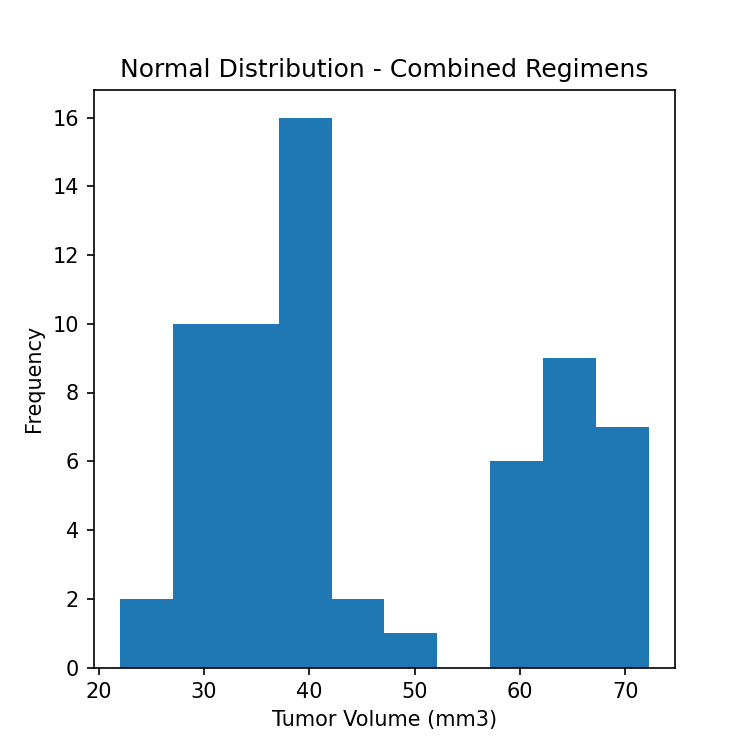

NormaltestResult(statistic=39.54038267198847, pvalue=2.5936716594421785e-09)


In [15]:
# Determine if for all four interested regimens is normally distributed - COMBINED analysis
plt.figure(figsize=(5,5))
plt.hist(df_tumor['Tumor Volume (mm3)'])
plt.title('Normal Distribution - Combined Regimens')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Frequency')

# Save the chart
plt.savefig(os.path.join("images","normal_distr_combined.png"))

# Show the chart
plt.show()

print(st.normaltest(df_tumor['Tumor Volume (mm3)'].sample(len(df_tumor))))

In [16]:
# Get outliers for all interested regimens - COMBINED analysis
print()
print(df_reglst)
print()

df_outlier = getoutliers(df_tumor)
print()

if (len(df_outlier) > 0): 
    print(df_outlier)
else:
    print("There are no outliers within this dataset.")


  Drug Regimen
0    Capomulin
1     Ramicane
2    Infubinol
3     Ceftamin

The lower quartile of tumor volume is: 33.48
The upper quartile of tumor volume is: 62.14
The interquartile range of tumor volume is: 28.66
The median of tumor volume is: 40.16 

Values below -9.51 could be outliers.
Values above 105.14 could be outliers.

There are no outliers within this dataset.


In [17]:
#Get outliers for a particular regimen - Capomulin only analysis
print(df_reglst.iloc[0,0])
print()

tumor_reg = []

for i in range(len(df_tumor)):
    if (df_tumor.loc[i]["Drug Regimen"] == "Capomulin"):
        tumor_reg.append(df_tumor.iloc[i])
    
df_tumor_reg1 = pd.DataFrame(tumor_reg)
df_tumor_reg1 = df_tumor_reg1.reset_index(drop=True)
df_outlier = getoutliers(df_tumor_reg1)
print()

if (len(df_outlier) > 0): 
    print("There is " + str(len(df_outlier)) + " outlier(s) within this dataset: ")
    print()
    print(df_outlier)
else:
    print("There are no outliers within this dataset.")

Capomulin

The lower quartile of tumor volume is: 32.38
The upper quartile of tumor volume is: 40.16
The interquartile range of tumor volume is: 7.78
The median of tumor volume is: 37.31 

Values below 20.7 could be outliers.
Values above 51.83 could be outliers.

There are no outliers within this dataset.


In [18]:
#Get outliers for a particular regimen - Ramicane only analysis
print(df_reglst.iloc[1,0])
print("")

tumor_reg = []

for i in range(len(df_tumor)):
    if (df_tumor.loc[i]["Drug Regimen"] == "Ramicane"):
        tumor_reg.append(df_tumor.iloc[i])
        
df_tumor_reg2 = pd.DataFrame(tumor_reg)
df_tumor_reg2 = df_tumor_reg2.reset_index(drop=True)
df_outlier = getoutliers(df_tumor_reg2)
print()

if (len(df_outlier) > 0):
    print("There is " + str(len(df_outlier)) + " outlier(s) within this dataset: ")
    print()
    print(df_outlier)
else:
    print("There are no outliers within this dataset.")

Ramicane

The lower quartile of tumor volume is: 30.87
The upper quartile of tumor volume is: 38.61
The interquartile range of tumor volume is: 7.74
The median of tumor volume is: 34.85 

Values below 19.25 could be outliers.
Values above 50.22 could be outliers.

There are no outliers within this dataset.


In [19]:
#Get outliers for a particular regimen - Infubinol only analysis
print(df_reglst.iloc[2,0])
print("")

tumor_reg = []

for i in range(len(df_tumor)):
    if (df_tumor.loc[i]["Drug Regimen"] == "Infubinol"):
        tumor_reg.append(df_tumor.iloc[i])

df_tumor_reg3 = pd.DataFrame(tumor_reg)
df_tumor_reg3 = df_tumor_reg3.reset_index(drop=True)
df_outlier = getoutliers(df_tumor_reg3)
print()

if (len(df_outlier) > 0): 
    print("There is " + str(len(df_outlier)) + " outlier(s) within this dataset: ")
    print()
    print(df_outlier)
else:
    print("There are no outliers within this dataset.")

Infubinol

The lower quartile of tumor volume is: 62.75
The upper quartile of tumor volume is: 67.69
The interquartile range of tumor volume is: 4.93
The median of tumor volume is: 66.08 

Values below 55.36 could be outliers.
Values above 75.08 could be outliers.

There are no outliers within this dataset.


In [20]:
#Get outliers for a particular regimen - Ceftamin only analysis
print(df_reglst.iloc[3,0])
print("")

tumor_reg = []

for i in range(len(df_tumor)):
    if (df_tumor.loc[i]["Drug Regimen"] == "Ceftamin"):
        tumor_reg.append(df_tumor.iloc[i])
        
df_tumor_reg4 = pd.DataFrame(tumor_reg)
df_tumor_reg4 = df_tumor_reg4.reset_index(drop=True)
df_outlier = getoutliers(df_tumor_reg4)
print()

if (len(df_outlier) > 0):
    print("There is " + str(len(df_outlier)) + " outlier(s) within this dataset: ")
    print()
    print(df_outlier)
else:
    print("There are no outliers within this dataset.")

Ceftamin

The lower quartile of tumor volume is: 61.43
The upper quartile of tumor volume is: 67.53
The interquartile range of tumor volume is: 6.09
The median of tumor volume is: 64.3 

Values below 52.29 could be outliers.
Values above 76.67 could be outliers.

There are no outliers within this dataset.


<IPython.core.display.Javascript object>


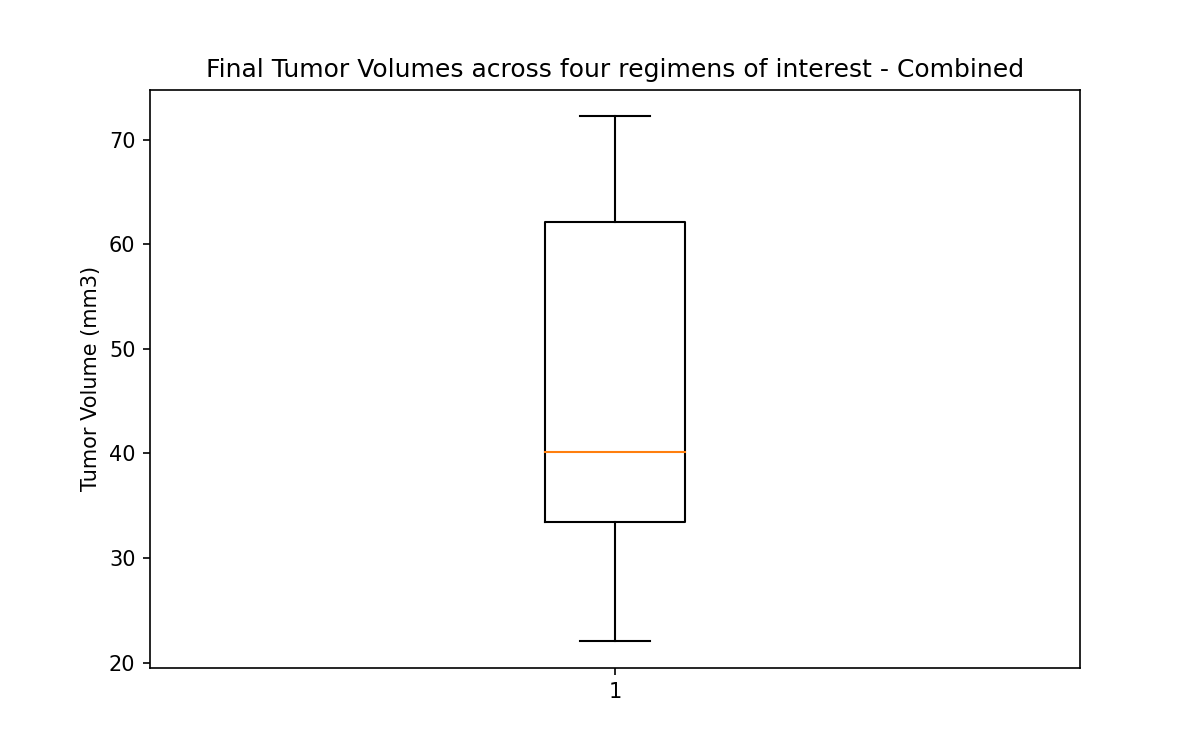

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest - COMBINED
tumors = df_tumor["Tumor Volume (mm3)"]

# Set the size of the plot (width, height) 
plt.figure(figsize=(8,5))

# Set title/labels
plt.title('Final Tumor Volumes across four regimens of interest - Combined')
plt.ylabel('Tumor Volume (mm3)')

# Create boxplot
plt.boxplot(tumors)

# Save the chart
plt.savefig(os.path.join("images","boxplot_combined.png"))

# Show the chart
plt.show()

<IPython.core.display.Javascript object>


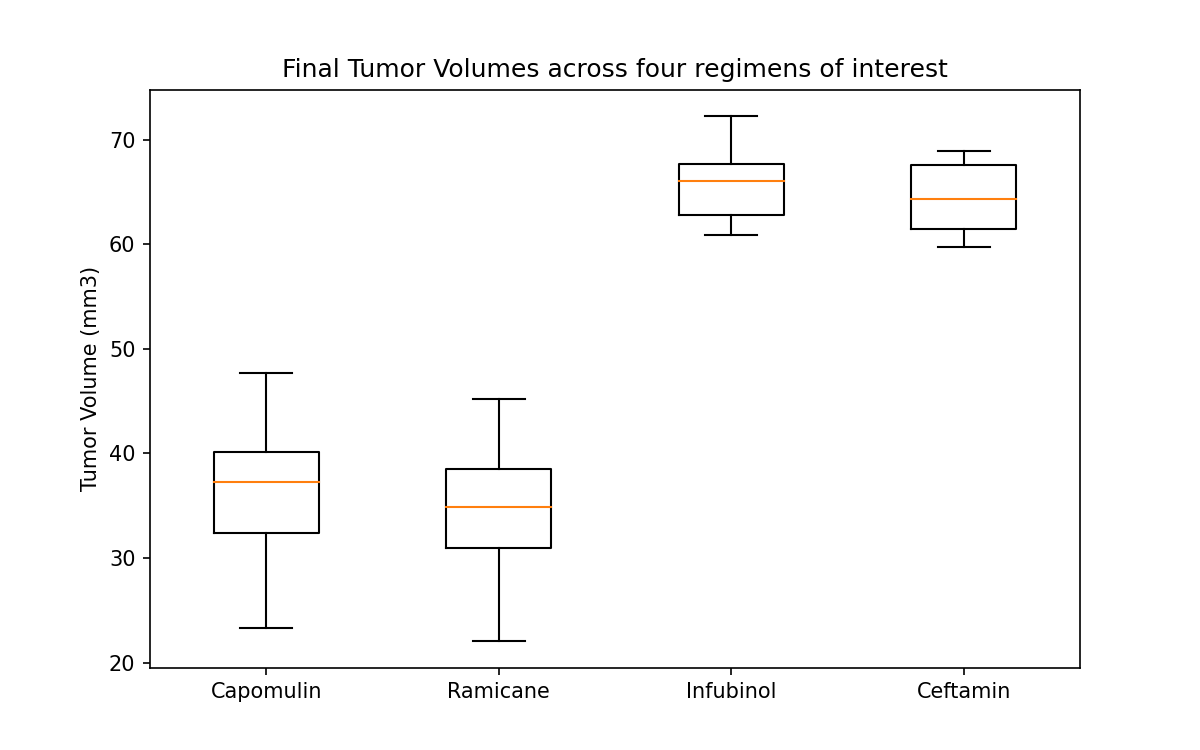

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest - INDIVIDUALLY
tumors1 = df_tumor_reg1["Tumor Volume (mm3)"]
tumors2 = df_tumor_reg2["Tumor Volume (mm3)"]
tumors3 = df_tumor_reg3["Tumor Volume (mm3)"]
tumors4 = df_tumor_reg4["Tumor Volume (mm3)"]

# Set the size of the plot (width, height) 
plt.figure(figsize=(8,5))

# Set title/labels
plt.title('Final Tumor Volumes across four regimens of interest')
plt.ylabel('Tumor Volume (mm3)')

# Create boxplot
red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot([tumors1,tumors2,tumors3,tumors4],
           labels=reglst["Drug Regimen"],
           flierprops=red_square)

# Save the chart
plt.savefig(os.path.join("images","boxplot_regimen.png"))

# Show the chart
plt.show()

## Functions - getmice(), getavgtumor()

In [23]:
# Create function for retrieving mouses timepoint and tumor volume for the regimen inputed
# Returns timepoints and tumor volumes in one dataframe
def getmice(regimen):
    mice_ids = []
    mices = []
    times = []
    tumors= []

    # Select all the mouses (timepoint to 45) that was treated with Capomulin by returning all of its mouse id
    for i in range(len(df_tumor)):
        if (df_tumor["Drug Regimen"][i] == regimen):
            mice_ids.append(df_tumor["Mouse ID"][i])
    df_mice_ids = pd.DataFrame(mice_ids)

    # Retrieve all the mouses timepoints and tumor volumes by comparing to the mouse ids selected above
    for i in range(len(df_clean)):
        for j in range(len(df_mice_ids)):
            if (df_clean["Mouse ID"][i] == df_mice_ids.loc[j,0]):
                mices.append(df_clean["Mouse ID"][i])
                times.append(df_clean["Timepoint"][i])
                tumors.append(df_clean["Tumor Volume (mm3)"][i])
                
    micelst = {
        "Mouse ID": mices,
        "Timepoint": times,
        "Tumor Volume (mm3)": tumors
    }

    df_mice = pd.DataFrame(micelst)

    return df_mice

In [24]:
# Create function for caculcating average tumor volume for each timepoint of the selected dataset
# Returns the average
def getavgtumor(dataset):

# Calculate the average tumor volumes for all these selected mouse at each timepoint
    df_tumor_avg = dataset.groupby(["Timepoint"]).mean().reset_index()
    df_tumor_avg = df_tumor_avg.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
    return df_tumor_avg

## INPUT DATA  - Drug Regimen, Mice ID

In [30]:
# Select which drug regimen to retrieve Mice Id listings from
print("Select the drug regimen from the following list to retrieve Mouse ID:")
print(reglst["Drug Regimen"])
print()
regimen = input("Drug Regimen: ")
#regimen = "Capomulin"
df_mice_data = getmice(regimen)

# Select which Mice ID to plot against the average tumor volume for the selected regimen
print()
print("Select the Mice ID from the following list to generate plot:")
print(df_mice_data["Mouse ID"].unique())
print()
mice_select = input("Mice Id: ")
#mice_select = "s185"

Select the drug regimen from the following list to retrieve Mouse ID:
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

Drug Regimen: Ramicane

Select the Mice ID from the following list to generate plot:
['k403' 'g791' 's508' 'm546' 'z578' 'j913' 'n364' 'c758' 'a644' 'i177'
 'j989' 'a520' 'r811' 'i334' 'd251' 'a411' 'e662' 'u196' 'q597' 'a444']

Mice Id: d251


## Line and Scatter Plots


   Timepoint  Average Tumor Volume (mm3)
0          0                   45.000000
1          5                   43.632879
2         10                   42.111555
3         15                   40.858715
4         20                   39.762729
5         25                   38.792697
6         30                   38.387121
7         35                   37.496514
8         40                   36.574081
9         45                   34.955595


  Mouse ID  Timepoint  Tumor Volume (mm3)
0     d251          0           45.000000
1     d251          5           41.746355
2     d251         10           42.432258
3     d251         15           39.472787
4     d251         20           37.652091
5     d251         25           38.097513
6     d251         30           38.718256
7     d251         35           37.708529
8     d251         40           38.265404
9     d251         45           37.311236


<IPython.core.display.Javascript object>


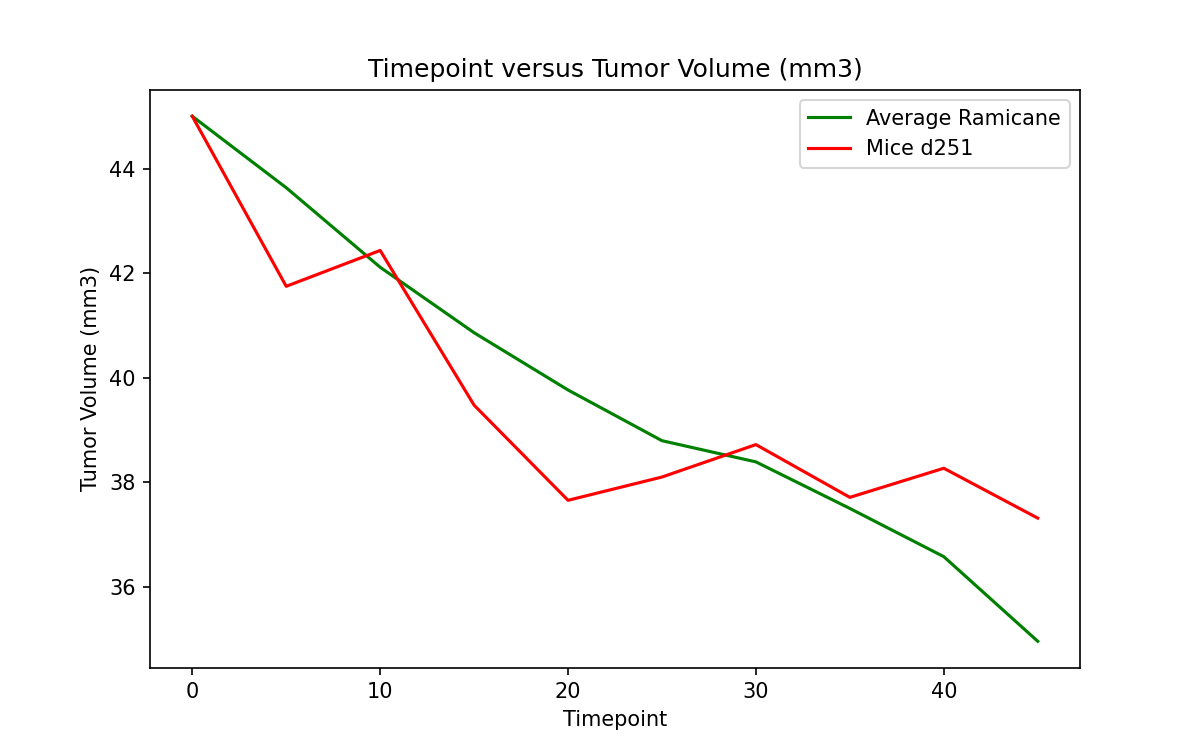

In [31]:
# Generate a line plot of time point versus tumor volume for the select mouse treated in the selected regimen
print()
df_tumoravg = getavgtumor(df_mice_data)
print(df_tumoravg)

mices = []
times = []
tumors= []
# Retrieve all the mouse timepoints and tumor volumes by comparing to the mouse id selected above
for i in range(len(df_clean)):
        if (df_clean["Mouse ID"][i] == mice_select):
            mices.append(df_clean["Mouse ID"][i])
            times.append(df_clean["Timepoint"][i])
            tumors.append(df_clean["Tumor Volume (mm3)"][i])

micelst = {
    "Mouse ID": mices,
    "Timepoint": times,
    "Tumor Volume (mm3)": tumors
}
print()
print()
df_mice = pd.DataFrame(micelst)
print(df_mice)

# Set the size of the plot (width, height) 
plt.figure(figsize=(8,5))

# Set title/labels
plt.title('Timepoint versus Tumor Volume (mm3)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')

# Plot the tumor volume average as a line chart
mice_avg = plt.plot(df_tumoravg["Timepoint"], df_tumoravg["Average Tumor Volume (mm3)"], color="green")

# Plot the tumor volumes for the selected mouse id
mice_selected = plt.plot(df_mice["Timepoint"], df_mice["Tumor Volume (mm3)"], color="red")

# Create a legend for our chart
plt.legend(handles=[mice_avg[0], mice_selected[0]], labels=['Average '+regimen, 'Mice ' + mice_select], loc="best")

# Save the chart
plt.savefig(os.path.join("images","timepoint_tumor_"+ mice_select +".png"))

# Show the chart
plt.show()

   Mouse ID  Weight (g)  Tumor Volume (mm3)
0      k403          16           32.358859
1      g791          16           37.489237
2      z578          16           38.411510
3      m546          16           38.807795
4      s508          17           36.050156
5      n364          17           37.287651
6      j913          17           39.128333
7      a644          17           41.228577
8      c758          17           41.868769
9      i177          18           37.882878
10     d251          19           39.640443
11     r811          19           39.647958
12     j989          19           40.108578
13     i334          20           40.033840
14     c458          20           42.269196
15     a520          21           37.989219
16     q610          21           43.183986
17     a411          22           40.701385
18     w678          24           44.083186
19     e662          24           44.268127
20     y449          24           45.359772
21     a444          25         

<IPython.core.display.Javascript object>


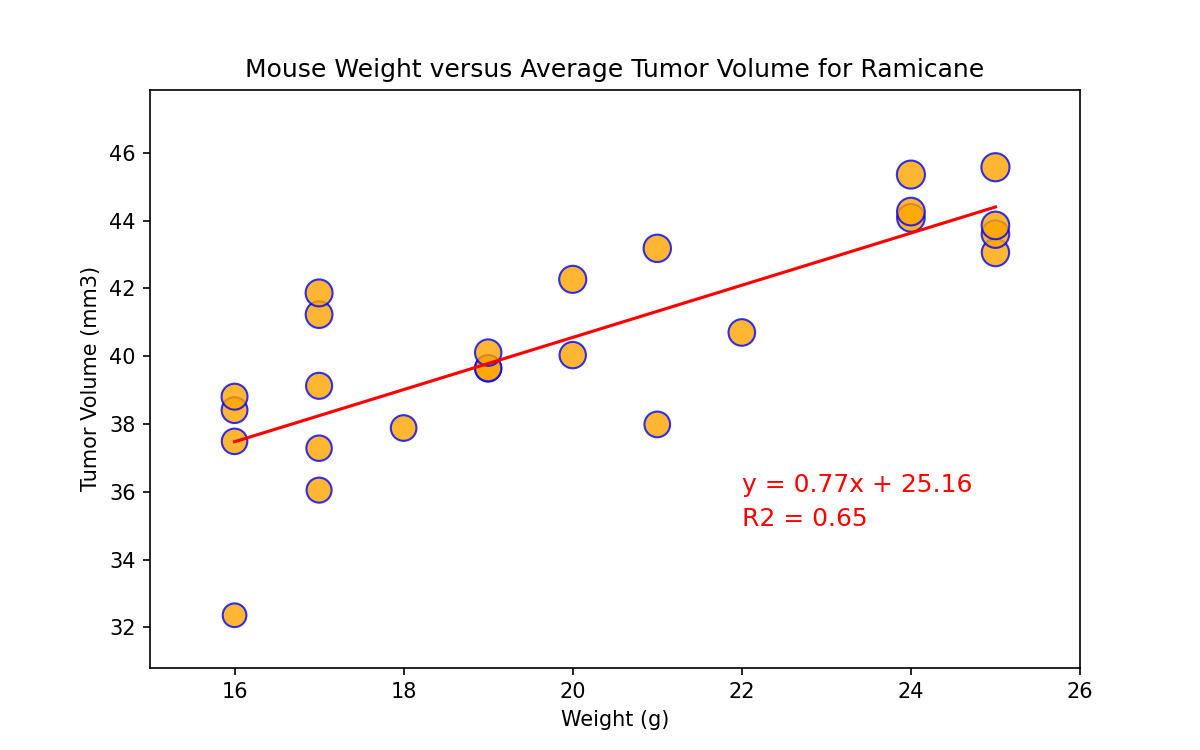

In [32]:
# Generate a scatter plot of mouse weight versus average tumor volume for the selected regimen

tumors = []
mouses = []
weights = []

# Retrieving average tumor volume per mice per drug regimen and include its weight
df_tumoravg = df_clean.groupby(["Mouse ID", "Drug Regimen", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()

# Filter the table for only the selected regimen and create separate lists for each field
for i in range(len(df_tumoravg)):
    if (df_tumoravg["Drug Regimen"][i] == regimen):
        tumors.append(df_tumoravg["Tumor Volume (mm3)"][i]),
        mouses.append(df_tumoravg["Mouse ID"][i]),
        weights.append(df_tumoravg["Weight (g)"][i])

regimens = {
    "Mouse ID": mouses,
    "Weight (g)": weights,
    "Tumor Volume (mm3)": tumors
}

df_regimens = pd.DataFrame(regimens)
df_regimens = df_regimens.sort_values(by=["Weight (g)", "Tumor Volume (mm3)"]).reset_index(drop=True)
print(df_regimens)

# Set the size of the plot (width, height) 
plt.figure(figsize=(8,5))

# Set title/labels
plt.title('Mouse Weight versus Average Tumor Volume for ' + regimen)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

# Create a scatter plot
plt.scatter(df_regimens["Weight (g)"], df_regimens["Tumor Volume (mm3)"], marker="o", 
            facecolors="orange", edgecolors="blue", s=np.array(df_regimens["Tumor Volume (mm3)"])*4, alpha=0.8)

# Set x and y limits
plt.ylim(min(tumors)/1.05, max(tumors)*1.05)
plt.xlim(min(weights)-1, max(weights)+1)

# Save the chart
plt.savefig(os.path.join("images","scatterplot_weight_tumor_" + str.lower(regimen) + ".png"))

# Show the chart
plt.show()

## Correlation and Regression

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the selected regimen
correlation = st.pearsonr(df_regimens["Weight (g)"], df_regimens["Tumor Volume (mm3)"])

print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
print(f"The p-value is {correlation[1]}")

The correlation coefficient (r) is 0.81
The p-value is 1.1543697209911494e-06


In [34]:
x_values = df_regimens["Weight (g)"]
y_values = df_regimens["Tumor Volume (mm3)"]

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Add the linear equation to the plot
plt.annotate(line_eq, (22,36), fontsize=12, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (22, 35), fontsize=12, color="red")

print(f"The line of best fit: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

# Save the chart
plt.savefig(os.path.join("images","scatterplot_weight_tumor_" + str.lower(regimen) + ".png"))

# Show the chart
plt.show()

The line of best fit: y = 0.77x + 25.16
The r-squared is: 0.6496844667454369
